In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Getting all the categories from the dir
categories = []
path = './Dataset'

for dir in os.listdir(path):
    categories.append(dir)
    
print(categories)

['Assault', 'Burglary', 'Robbery', 'Shooting', 'Stealing']


In [3]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 20763 files belonging to 5 classes.


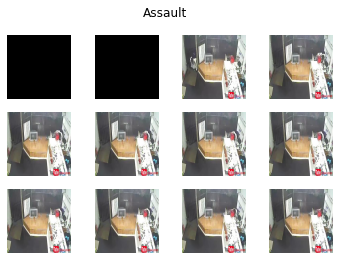

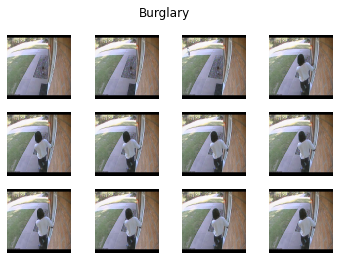

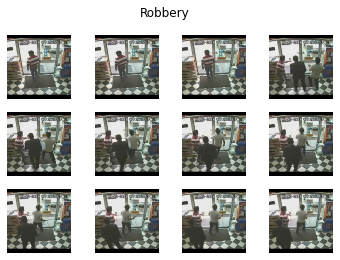

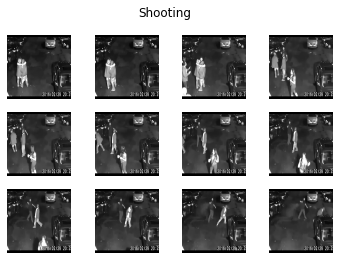

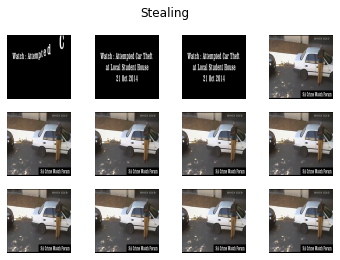

In [4]:
# Using matplotlib to show 12 images from the dataset of each category
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+'/'+category)[:12]):
        img = plt.imread(path+'/'+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [5]:
# Getting the max and min pixels height and width of the dataset image
imageHeight = []
imageWidth = []

for category in categories:
    for files in os.listdir(path+'/'+category):
        imageHeight.append(plt.imread(path+'/'+category+'/'+ files).shape[0])
        imageWidth.append(plt.imread(path+'/'+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(imageHeight), 'width min : ', min(imageWidth))
    print(category, ' => height max : ', max(imageHeight), 'width max : ', max(imageWidth))
    imageHeight = []
    imageWidth = []

Assault  => height min :  64 width min :  64
Assault  => height max :  64 width max :  64
Burglary  => height min :  64 width min :  64
Burglary  => height max :  64 width max :  64
Robbery  => height min :  64 width min :  64
Robbery  => height max :  64 width max :  64
Shooting  => height min :  64 width min :  64
Shooting  => height max :  64 width max :  64
Stealing  => height min :  64 width min :  64
Stealing  => height max :  64 width max :  64


In [6]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 151
WIDTH = 220
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+'/'+category):
        imagePaths.append([path+'/'+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths[:10000]:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    # image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['./Dataset/Assault/Assault006_x264_4690.png', 0], ['./Dataset/Shooting/Shooting032_x264_6240.png', 3], ['./Dataset/Shooting/Shooting032_x264_3670.png', 3], ['./Dataset/Shooting/Shooting032_x264_18470.png', 3], ['./Dataset/Burglary/Burglary032_x264_2120.png', 1], ['./Dataset/Shooting/Shooting015_x264_880.png', 3], ['./Dataset/Shooting/Shooting047_x264_3170.png', 3], ['./Dataset/Robbery/Robbery102_x264_1410.png', 2], ['./Dataset/Burglary/Burglary005_x264_6060.png', 1], ['./Dataset/Burglary/Burglary005_x264_6340.png', 1]]


In [7]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

labels = np.array(labels)
print(data.shape, labels.shape)

(10000, 64, 64, 3) (10000,)


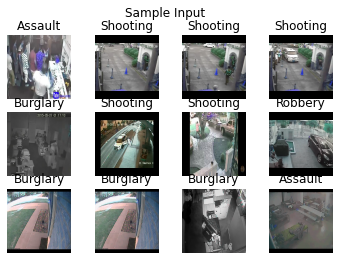

In [8]:
# Let's check everything is ok
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(8000, 64, 64, 3)
(2000, 64, 64, 3)
(8000,)
(2000,)


In [16]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=( 3,3), activation='relu', input_shape = (64, 64,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=( 3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=( 3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(5))
cnn.add(tf.keras.layers.Activation('softmax'))

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

In [19]:
history = cnn.fit(trainX, trainY, epochs = 5,validation_data=(testX, testY))

Epoch 1/5
250/250 [==============================] - 19s 74ms/step - loss: 0.5309 - accuracy: 0.8173 - val_loss: 0.0624 - val_accuracy: 0.9730
Epoch 2/5
250/250 [==============================] - 19s 75ms/step - loss: 0.0971 - accuracy: 0.9684 - val_loss: 0.0176 - val_accuracy: 0.9945
Epoch 3/5
250/250 [==============================] - 19s 74ms/step - loss: 0.0672 - accuracy: 0.9778 - val_loss: 0.0115 - val_accuracy: 0.9975
Epoch 4/5
250/250 [==============================] - 18s 73ms/step - loss: 0.0497 - accuracy: 0.9830 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 5/5
250/250 [==============================] - 18s 73ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0049 - val_accuracy: 0.9985


63/63 - 1s - loss: 0.0049 - accuracy: 0.9985 - 925ms/epoch - 15ms/step


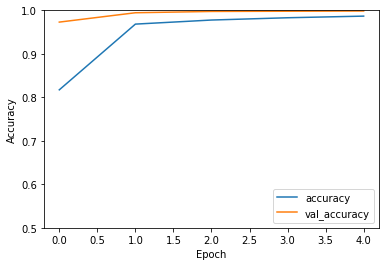

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(testX, testY, verbose=2)